In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib

In [2]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df = df.drop('Unnamed: 32', axis='columns')

In [6]:
df = df.drop('id', axis='columns')

In [7]:
df.select_dtypes(include=np.number)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
len(df.columns)

31

In [13]:
len(df.select_dtypes(include=np.number).columns)

30

In [14]:
input_cols = df.select_dtypes(include=np.number).columns
target_col = 'diagnosis'

In [15]:
df[input_cols]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
df[target_col]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

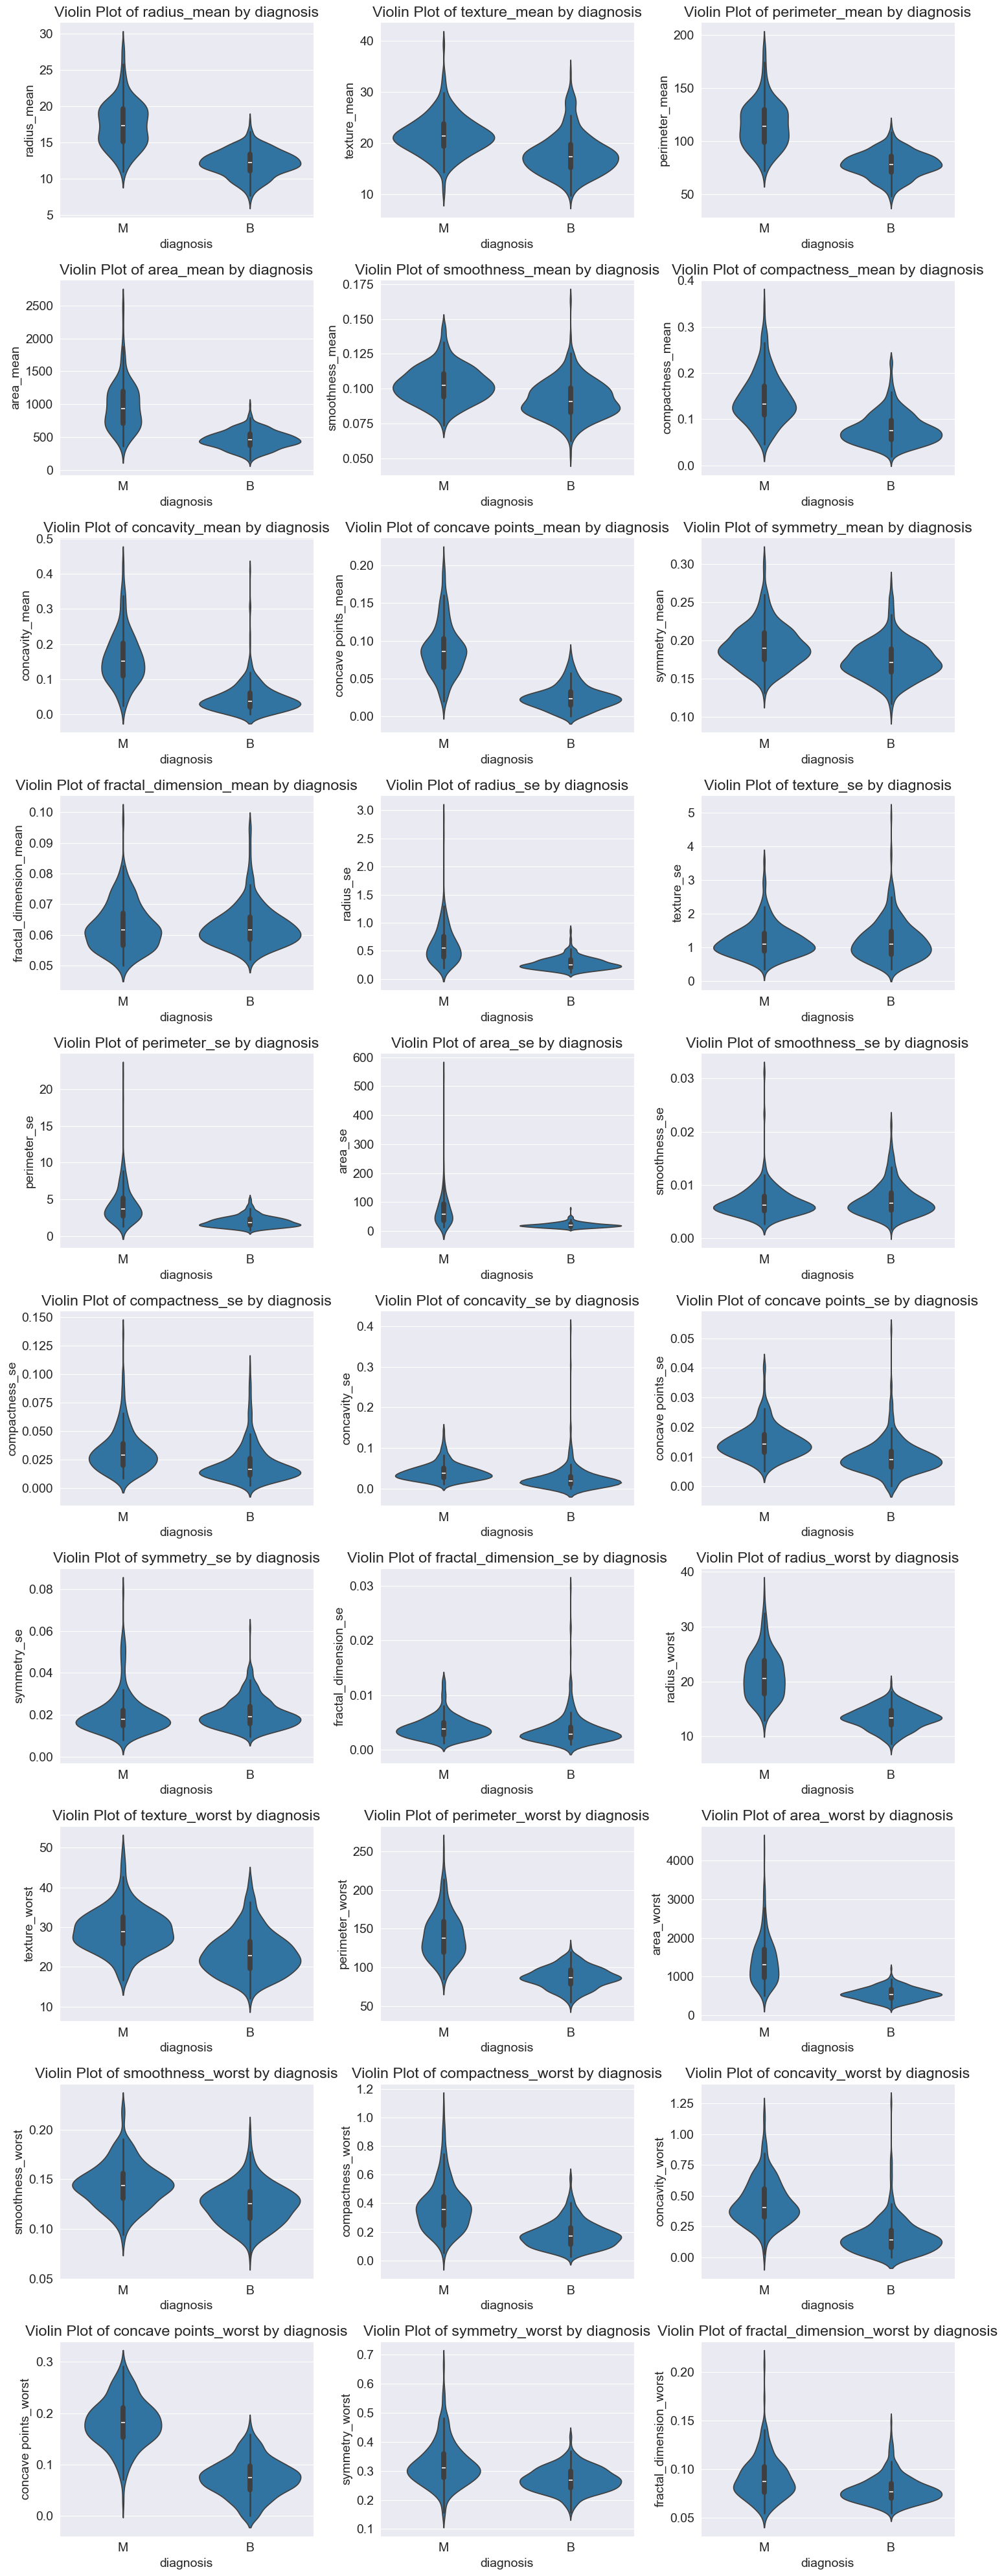

In [17]:
import math

num_cols = len(df.columns) - 1 
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row*5, rows*4))
axes = axes.flatten() 

plot_idx = 0
for col in df.columns:
    if col == target_col:
        continue
    
    sns.violinplot(x=target_col, y=col, data=df, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'Violin Plot of {col} by {target_col}')
    plot_idx += 1

for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [18]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [19]:
train_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,B,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,M,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,B,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,M,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,M,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,...,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,B,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,M,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [20]:
val_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
95,M,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,...,24.220,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
93,B,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,...,15.100,25.94,97.59,699.4,0.1339,0.17510,0.13810,0.07911,0.2678,0.06603
401,B,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,...,13.800,20.14,87.64,589.5,0.1374,0.15750,0.15140,0.06876,0.2460,0.07262
345,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.880,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488
194,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,M,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,...,28.110,18.47,188.50,2499.0,0.1142,0.15160,0.32010,0.15950,0.1648,0.05525
15,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,...,17.460,37.13,124.10,943.2,0.1678,0.65770,0.70260,0.17120,0.4218,0.13410
428,B,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,...,11.680,20.29,74.35,421.1,0.1030,0.06219,0.04580,0.04044,0.2383,0.07083
363,B,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,...,18.130,25.45,117.20,1009.0,0.1338,0.16790,0.16630,0.09123,0.2394,0.06469


In [21]:
test_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,M,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,B,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,M,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,B,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,B,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [22]:
train_df["diagnosis"] = train_df["diagnosis"].replace({"M": 1, "B": 0})
val_df["diagnosis"] = val_df["diagnosis"].replace({"M": 1, "B": 0})
test_df["diagnosis"] = test_df["diagnosis"].replace({"M": 1, "B": 0})

C:\Users\Ansh\AppData\Local\Temp\ipykernel_8960\1322488529.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["diagnosis"] = train_df["diagnosis"].replace({"M": 1, "B": 0})
C:\Users\Ansh\AppData\Local\Temp\ipykernel_8960\1322488529.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val_df["diagnosis"] = val_df["diagnosis"].replace({"M": 1, "B": 0})
C:\Users\Ansh\AppData\Local\Temp\ipykernel_8960\1322488529.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(df[input_cols])

StandardScaler()

In [25]:
train_df[input_cols] = scaler.transform(train_df[input_cols])
val_df[input_cols] = scaler.transform(val_df[input_cols])
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [26]:
train_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.366569,-0.035732,-0.037581,-0.038648,-0.034923,-0.030308,-0.039264,-0.041937,-0.045504,0.030835,...,-0.029732,-0.034514,-0.029430,-0.024660,-0.035712,-0.033935,-0.039091,-0.031115,0.027143,-0.015194
std,0.482575,0.986489,0.976802,0.984641,0.982580,1.028335,1.021368,0.993605,0.985631,1.028886,...,1.003405,0.973331,1.002596,1.017069,1.026467,0.999615,0.964904,1.008983,1.037870,0.998921
min,0.000000,-1.827998,-2.229249,-1.814389,-1.377937,-3.112085,-1.610136,-1.114873,-1.261820,-2.353466,...,-1.572003,-2.223994,-1.571835,-1.154919,-2.240829,-1.399158,-1.305831,-1.745063,-2.160960,-1.601839
25%,0.000000,-0.709266,-0.691057,-0.712139,-0.689095,-0.750104,-0.810194,-0.783673,-0.765543,-0.699589,...,-0.681134,-0.732345,-0.704471,-0.644597,-0.805204,-0.738972,-0.784340,-0.786396,-0.607890,-0.733474
50%,0.000000,-0.263364,-0.109290,-0.267285,-0.331307,-0.139504,-0.339629,-0.389949,-0.423515,-0.046070,...,-0.281464,-0.074456,-0.300575,-0.361925,-0.090679,-0.308942,-0.273883,-0.243568,-0.096672,-0.240273
75%,1.000000,0.435311,0.528326,0.446130,0.294964,0.607733,0.484381,0.414323,0.484949,0.563638,...,0.379129,0.607860,0.450921,0.246841,0.597545,0.555572,0.497558,0.637900,0.445285,0.449654
max,1.000000,3.775318,4.651889,3.910226,5.250529,4.770911,3.924075,4.243589,3.927930,3.400421,...,4.094189,3.885905,4.287337,5.930172,3.771263,4.348873,3.303630,2.685877,6.046041,4.935010


In [27]:
val_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.385965,0.095936,0.015249,0.101335,0.098656,-0.084382,0.062862,0.130396,0.070299,-0.101443,...,0.060763,0.011251,0.069237,0.048533,-0.039525,0.062832,0.163002,0.067303,-0.053644,0.028202
std,0.488972,1.053800,1.042350,1.049028,1.084402,0.872021,0.908890,1.003210,0.969044,0.920773,...,0.976059,1.033009,0.968770,0.940480,0.971176,0.945108,1.105644,0.951159,0.973420,0.962528
min,0.000000,-1.678039,-1.970944,-1.594021,-1.282659,-2.151351,-1.533193,-1.114873,-1.261820,-1.849636,...,-1.486271,-1.631243,-1.464904,-1.108862,-2.682695,-1.443878,-1.305831,-1.745063,-2.026684,-1.590202
25%,0.000000,-0.591400,-0.813228,-0.623374,-0.596306,-0.629123,-0.610398,-0.648926,-0.648439,-0.720582,...,-0.602442,-0.789340,-0.611912,-0.585531,-0.658353,-0.575166,-0.621824,-0.701622,-0.732864,-0.642038
50%,0.000000,-0.178160,-0.184920,-0.187376,-0.260773,-0.104277,-0.081226,-0.134518,-0.336460,-0.268777,...,-0.240048,-0.074456,-0.243535,-0.310857,-0.016158,-0.176306,-0.098294,-0.238163,-0.269774,-0.145512
75%,1.000000,0.570928,0.649915,0.594414,0.428068,0.538347,0.554975,0.718153,0.878565,0.429465,...,0.701142,0.713301,0.687719,0.563265,0.592065,0.543486,0.630450,0.843078,0.447307,0.451732
max,1.000000,3.971288,2.659920,3.976130,5.244841,1.895827,2.904485,3.308243,2.916806,4.484751,...,2.826844,2.786709,2.932082,3.096417,2.407967,3.418837,4.700669,2.416366,2.996525,3.582864


In [28]:
test_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.377193,0.010946,0.097165,0.014268,0.005807,0.175041,0.054587,-0.004952,0.065813,0.009207,...,0.028173,0.091988,0.018794,0.025231,0.146347,0.038675,-0.046072,0.025768,-0.027547,0.017245
std,0.486824,0.991742,1.031509,1.001365,0.970051,1.025834,1.029011,1.017837,1.075986,0.994509,...,1.022809,1.051441,1.031787,1.016660,0.946023,1.061447,0.988957,1.029264,0.917009,1.051086
min,0.000000,-2.029648,-1.943019,-1.984504,-1.454443,-1.998346,-1.303122,-1.114873,-1.261820,-2.744117,...,-1.726901,-2.147457,-1.693361,-1.222423,-1.945375,-1.267986,-1.305831,-1.745063,-2.159342,-1.379622
25%,0.000000,-0.692935,-0.714910,-0.689690,-0.671959,-0.526111,-0.657351,-0.737565,-0.750002,-0.656690,...,-0.708054,-0.719317,-0.692482,-0.658924,-0.455612,-0.657864,-0.814108,-0.690621,-0.622450,-0.639821
50%,0.000000,-0.188100,0.057095,-0.189023,-0.302013,0.193906,-0.128415,-0.324412,-0.386114,-0.064325,...,-0.274217,0.018365,-0.301022,-0.350498,0.152611,-0.246282,-0.209836,-0.199563,-0.149250,-0.232515
75%,1.000000,0.548207,0.787794,0.549105,0.432050,0.753622,0.444583,0.382935,0.620303,0.465975,...,0.709425,0.710858,0.652721,0.580844,0.561380,0.394470,0.468533,0.797018,0.466720,0.452979
max,1.000000,3.150487,2.753002,3.275896,3.478653,2.899260,4.568425,3.598263,3.497170,3.995524,...,3.359046,3.498337,3.179304,4.485168,3.955374,5.112877,3.995433,2.620403,4.107940,6.846856


In [29]:
model = LogisticRegression(solver='liblinear')

In [30]:
model.fit(train_df[input_cols], train_df[target_col])

LogisticRegression(solver='liblinear')

In [31]:
df[input_cols]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
print("Coefficients (weights):", model.coef_)
print("Intercept (bias):", model.intercept_)

Coefficients (weights): [[ 0.61394793  0.69262544  0.59325729  0.63319248  0.18921507 -0.26561273
   0.87031768  0.95060471 -0.0810311  -0.22284296  1.03003133 -0.44971004
   0.64256755  0.80151137  0.2825721  -0.5943257   0.15395207  0.09677926
  -0.53332507 -0.53889639  0.84458544  1.37298167  0.62753204  0.81039511
   0.69759587  0.0085229   0.96807049  0.64169599  1.18677695  0.01510345]]
Intercept (bias): [-0.29606658]


In [33]:
raw_predictions = model.predict(val_df[input_cols])

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [35]:
prob_preds = sigmoid(raw_predictions)    

In [36]:
prob_preds

array([0.73105858, 0.5       , 0.5       , 0.5       , 0.73105858,
       0.73105858, 0.5       , 0.5       , 0.5       , 0.73105858,
       0.73105858, 0.5       , 0.5       , 0.73105858, 0.5       ,
       0.73105858, 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.73105858, 0.73105858, 0.5       , 0.5       ,
       0.73105858, 0.5       , 0.73105858, 0.73105858, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.73105858, 0.73105858, 0.73105858, 0.5       , 0.5       ,
       0.73105858, 0.73105858, 0.5       , 0.5       , 0.5       ,
       0.5       , 0.73105858, 0.5       , 0.5       , 0.5       ,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.5       , 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.5       , 0.5       , 0.5       , 0.73105858, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.73105858,
       0.5       , 0.5       , 0.73105858, 0.5       , 0.5    

In [37]:
def binary_cross_entropy(yhat, y):
    eps = 1e-15
    yhat = np.clip(yhat, eps, 1 - eps)
    n = len(y)
    return (-1 / n) * (np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)))


In [38]:
binary_cross_entropy(prob_preds, val_df[target_col])

np.float64(0.558628968272278)

In [39]:
raw_predictions = model.predict(train_df[input_cols])

In [40]:
prob_preds = sigmoid(raw_predictions)

In [41]:
binary_cross_entropy(prob_preds, train_df[target_col])

np.float64(0.5579395525916943)

In [45]:
raw_predictions = model.predict(test_df[input_cols])

In [46]:
prob_preds = sigmoid(raw_predictions)

In [47]:
binary_cross_entropy(prob_preds, test_df[target_col])

np.float64(0.5586289682722779)